<a href="https://colab.research.google.com/github/sergiolcrezende/Mackenzie/blob/main/trilha_4_analise_Sergio_Rezende.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trilha 4 - Analise de base de dados - Sergio Luiz Custódio Rezende**

O estudo foi feito levando em conta o momento atual com relação a crise do petróleo devido a guerra entre a Rússia e a Ucránia.
Foi levantado as informações com relação ao preço do petróleo e a ações da Petrobrás.
O estudo foi feito com informações no período de 2018 a até 02/2022.

Este levantamento visa responder as perguntas:

1) Qual é a tendência do preço do petróleo nos últimos anos?
>
2) Qual é a tendência do preço do petróleo x ações da Petrobrás?
>
3) Qual é a maior variação de volume financeiro das ações da Petrobrás?
>
4) Qual é o valor máximo no pregão das ações da Petrobrás?



###Abertura das bibliotecas utilizadas

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Abertura do arquivo base do estudo com relação ao petróleo e avaliação dos dados após a importação 

In [270]:
petro = pd.read_csv('https://raw.githubusercontent.com/sergiolcrezende/Mackenzie/main/crude-oil-price.v4.csv')

display('shape: ',petro.shape)
display('head:', petro.head())
display('tail:',petro.tail())
display('quantidade de preço:', petro.price.value_counts())
display('datas duplicadas:',petro.date.duplicated().sum())
display('data minima e máxima:', petro.date.min(), petro.date.max())


'shape: '

(51, 4)

'head:'

,date,price,percentChange,change
0,2018-01-01,64.73,7.133400,4.31
1,2018-02-01,61.64,-4.773675,-3.09
2,2018-03-01,64.94,5.353666,3.30
3,2018-04-01,68.57,5.589775,3.63
4,2018-05-01,67.04,-2.231296,-1.53


'tail:'

,date,price,percentChange,change
46,2021-11-01,65.85,-19.479090,-15.93
47,2021-12-01,74.88,13.712984,9.03
48,2022-01-03,86.49,15.504808,11.61
49,2022-02-01,95.72,10.671754,9.23
50,2022-03-01,109.33,14.218554,13.61


'quantidade de preço:'

64.7300     1
59.1600     1
35.4900     1
39.2700     1
40.2700     1
42.6100     1
40.2200     1
35.7900     1
45.3400     1
48.5200     1
52.2000     1
61.5000     1
63.5800     1
20.4800     1
66.9300     1
73.4700     1
73.9500     1
68.5000     1
75.0300     1
81.7800     1
65.8500     1
74.8800     1
86.4900     1
95.7200     1
18.8400     1
44.7600     1
61.6400     1
53.7900     1
64.9400     1
68.5700     1
67.0400     1
74.1500     1
68.7600     1
69.9977     1
73.5992     1
65.3100     1
50.9300     1
45.4100     1
57.2200     1
51.5600     1
60.1400     1
63.9100     1
53.5000     1
59.4601     1
58.5800     1
55.1000     1
54.0700     1
54.1800     1
55.4872     1
60.7556     1
109.3300    1
Name: price, dtype: int64

'datas duplicadas:'

0

'data minima e máxima:'

'2018-01-01'

'2022-03-01'

### Abertura do arquivo base do estudo com relação as ações da petrobrás e avaliação dos dados após a importação 

In [271]:
acao = pd.read_csv('https://raw.githubusercontent.com/sergiolcrezende/Mackenzie/main/PETR4.dados.historicos.v5.csv')

display('shape: ',acao.shape)
display('head:', acao.head())
display('tail:',acao.tail())
display('quantidade de variacao:', acao.Variacao.value_counts())
display('datas duplicadas:',acao.data.duplicated().sum())
display('data minima e máxima:', acao.data.min(),acao.data.max())


'shape: '

(1037, 7)

'head:'

,data,ultimo,abertura,maxima,minima,Volume,Variacao
0,11/03/2022,32.49,33.91,34.38,32.07,92.15,-3.59%
1,10/03/2022,33.70,32.60,34.60,32.52,136.44,3.50%
2,09/03/2022,32.56,32.60,32.82,31.74,87.78,0.31%
3,08/03/2022,32.46,32.00,32.97,31.51,111.63,2.08%
4,07/03/2022,31.80,34.50,34.60,31.63,110.95,-7.10%


'tail:'

,data,ultimo,abertura,maxima,minima,Volume,Variacao
1032,08/01/2018,16.34,16.06,16.34,16.03,28.40,1.18%
1033,05/01/2018,16.15,16.02,16.17,15.90,26.96,0.62%
1034,04/01/2018,16.05,16.10,16.27,15.94,37.06,0.19%
1035,03/01/2018,16.02,15.82,16.04,15.70,55.94,0.88%
1036,02/01/2018,15.88,15.53,15.88,15.53,33.46,2.78%


'quantidade de variacao:'

0.00%     9
0.18%     6
0.86%     5
1.33%     5
-0.56%    5
         ..
5.51%     1
-3.71%    1
-3.17%    1
-4.11%    1
0.88%     1
Name: Variacao, Length: 630, dtype: int64

'datas duplicadas:'

0

'data minima e máxima:'

'01/02/2018'

'31/10/2019'

### Renomeando o campo 'data' do arquivo de "Ação" para o mesmo padrão do arquivo "Petróleo" e mostrando  o resultado

In [272]:
acao = acao.rename(columns={'data': 'date'})
display(1,acao.head())


1

,date,ultimo,abertura,maxima,minima,Volume,Variacao
0,11/03/2022,32.49,33.91,34.38,32.07,92.15,-3.59%
1,10/03/2022,33.70,32.60,34.60,32.52,136.44,3.50%
2,09/03/2022,32.56,32.60,32.82,31.74,87.78,0.31%
3,08/03/2022,32.46,32.00,32.97,31.51,111.63,2.08%
4,07/03/2022,31.80,34.50,34.60,31.63,110.95,-7.10%


### Formatando o campo 'data'  e mostrando se o campo ficou com datetime

In [274]:
petro.date = pd.to_datetime(petro.date, format='%Y-%m-%d',errors='raise')
display(1, petro.dtypes)

acao.date = pd.to_datetime(acao.date, format='%d/%m/%Y',errors='raise')
display(1, acao.dtypes)

1

date             datetime64[ns]
price                   float64
percentChange           float64
change                  float64
dtype: object

1

date        datetime64[ns]
ultimo             float64
abertura           float64
maxima             float64
minima             float64
Volume             float64
Variacao            object
dtype: object

### Fazendo merge entre as bases

In [275]:
petro = pd.merge(petro, acao[['date','Variacao','Volume','maxima']], on='date')
display(1,petro.head())

1

,date,price,percentChange,change,Variacao,Volume,maxima
0,2018-02-01,61.6400,-4.773675,-3.0900,4.18%,51.95,19.78
1,2018-03-01,64.9400,5.353666,3.3000,-1.99%,66.38,20.59
2,2018-06-01,74.1500,10.605609,7.1100,-14.86%,215.14,18.99
3,2018-08-01,69.9977,1.800029,1.2377,1.42%,38.66,19.23
4,2018-10-01,65.3100,-11.262622,-8.2892,-0.39%,56.19,20.58


### Verificando se tem campo nulo no arquivo 'petroleo' e mostrando a estatistica do arquivo

In [276]:
print(petro.isnull().sum())
print(petro.describe())

date             0
price            0
percentChange    0
change           0
Variacao         0
Volume           0
maxima           0
dtype: int64
           price  percentChange     change      Volume     maxima
count  37.000000      37.000000  37.000000   37.000000  37.000000
mean   58.788511       0.578124   0.524476   72.740000  25.227297
std    16.457504      13.446773   7.461570   33.911663   4.051815
min    18.840000     -54.244861 -24.280000   32.220000  14.550000
25%    50.930000      -5.609012  -2.390000   47.970000  22.550000
50%    60.140000       5.103111   2.340000   65.900000  26.380000
75%    68.500000       8.996401   4.420000   90.020000  27.700000
max    95.720000      18.454085  11.610000  215.140000  33.320000


### Gerando indice e crindo campo

In [277]:
petro.index
petro['dias'] = petro['date'] - petro['date'].min()

###1a. pergunta) Qual é a tendência do preço do petróleo nos últimos anos?
🎢

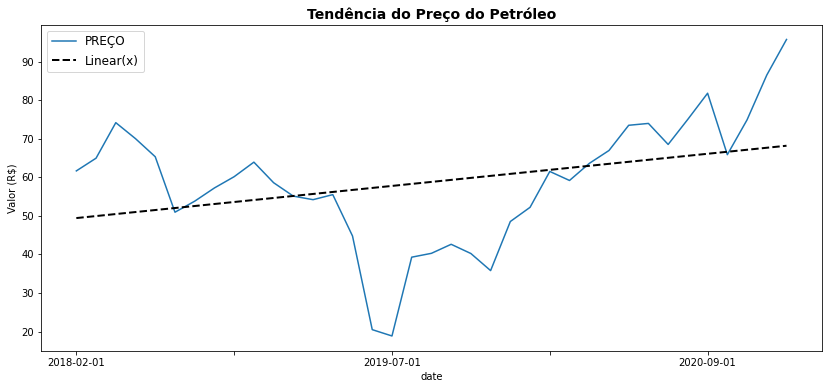

In [278]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(petro.index, petro.price, label='PREÇO')
ax.set_title('Tendência do Preço do Petróleo', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

z = np.polyfit(petro.index,petro.price, 1)
p = np.poly1d(z)
ax.plot(petro.index,p(petro.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')
ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(['',petro.iloc[0].date.date(),'',petro.iloc[10].date.date(),'',petro.iloc[20].date.date()])

plt.show()

O gráfico mostra a tendêndia do preço do petróleo no período de 50 meses.
 Onde em julho/2019 teve a menor baixa e em fevereiro/22 sua maior alta, isso devido a guerra da Rússia e a Ucránia.
A tendência é subir ainda mais devido a guerra.

### 2a Pergunta) Qual é a tendência de alteração de preço do Petróleo x Ação da Petrobrás?

🎢

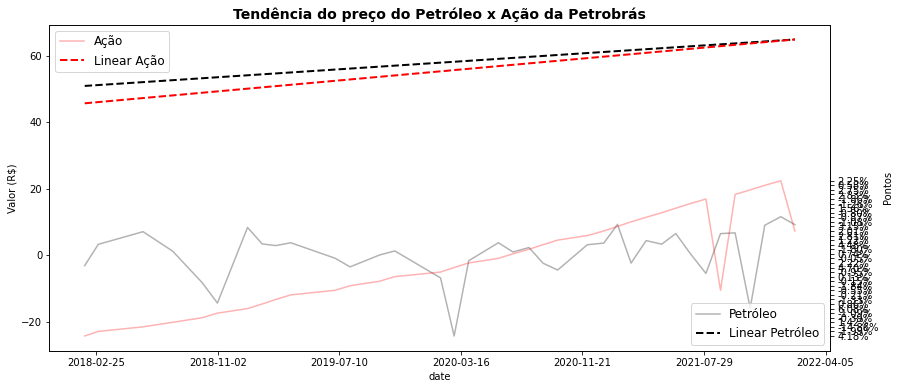

In [279]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(petro.date, petro.change, label='Petróleo', color='k', alpha=0.3)
ax2 = ax.twinx() 
ax2.plot(petro.date, petro.Variacao, label='Ação', color='r', alpha=0.3)

ax.set_title('Tendência do preço do Petróleo x Ação da Petrobrás', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")
ax2.set_ylabel("Pontos")

z = np.polyfit(petro.dias.dt.days,petro.price, 1)
p = np.poly1d(z)
ax.plot(petro.date,p(petro.dias.dt.days), linestyle='dashed', label='Linear Petróleo' ,linewidth=2, color='k')

z = np.polyfit(petro.dias.dt.days,petro.price, 1)
p = np.poly1d(z)
ax2.plot(petro.date,p(petro.dias.dt.days), linestyle='dashed', label='Linear Ação' ,linewidth=2, color='r')

ax.legend(loc='lower right',fontsize=12)
ax2.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Comentário: A tendência linear entre as ações e o preço do petróleo se aproximaram nos últimos anos.

O preço do petróleo ao longo dos anos teve muitas ocilações e com a guerra a tendencia e aumentar.
As ações teve um crescimento ao longo dos anos, e atualmente está em queda devido a guerra.


### 3a. Pergunta) Qual é a maior variação de volume financeiro das ações da Petrobrás?

🎢

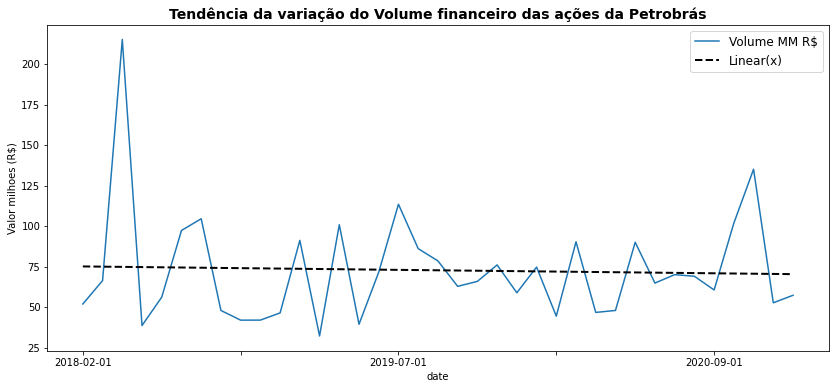

In [280]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(petro.index, petro.Volume, label='Volume MM R$')
ax.set_title('Tendência da variação do Volume financeiro das ações da Petrobrás', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor milhoes (R$)")

z = np.polyfit(petro.index,petro.Volume, 1)
p = np.poly1d(z)
ax.plot(petro.index,p(petro.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')
ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(['',petro.iloc[0].date.date(),'',petro.iloc[10].date.date(),'',petro.iloc[20].date.date()])

plt.show()

Comentário: Houve um pico muito alto de aplicações em 2018, mas isso não ocorreu nos anos seguintes. A média foi bem abaixo ao longo dos anos.
Em setembro/2020 houve um pico, mas caiu em seguida. 
O valor oscilando entre 50 a 100 milhões.
A tendência e aumentar o volume financeiro devido a guerra.

### 4a Pergunta) Qual é o valor máximo no pregão das ações da Petrobrás?

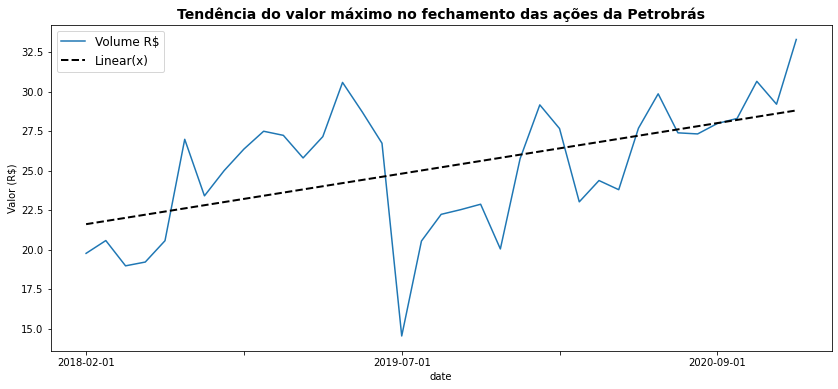

In [281]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(petro.index, petro.maxima, label='Volume R$')
ax.set_title('Tendência do valor máximo no fechamento das ações da Petrobrás', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

z = np.polyfit(petro.index,petro.maxima, 1)
p = np.poly1d(z)
ax.plot(petro.index,p(petro.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')
ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(['',petro.iloc[0].date.date(),'',petro.iloc[10].date.date(),'',petro.iloc[20].date.date()])

plt.show()

Comentário:  O valor máximo no fechamento das ações oscila muito ao longo dos anos.
No período de 2019 a meados de 2020 variou entre 15,00 a 30,0 a ação. No  momento está valendo 32,50. Neste período de guerra as bolsas estão oscilando muito. 

### Resumo 

1) A tendência é subir o preço do petróleo por causa da guerra. Todos estão com muitas expectativas, pois a alta vai gerar impacto em todas as economias mundiais.

2) No período que foi baixado a base, está ocorrendo uma tendência de baixa das ações, mas as expectativas dos investidores no momento é de aumento até o final do ano.
O preço do petróleo está subindo. Isso tudo devido a guerra. Estão ocorrendo muitas expeculações financeira.

3) O volume financeiro das aplicações variaram muito nos últimos anos.
A tendencia e aumentar devido a guerra.

4)  O valor máximo no fechamento das ações oscilou muito ao longo dos anos.
A tendência e aumentar até o final do ano, conforme informações dos jornais atualmente.